In [45]:
%matplotlib inline

In [46]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [47]:
class Orbit():
    """
    Parameters
    ----------
    M1 : float
        mass of the first body
    M2 : float
        mass of the second body
    G  : float
        Newtons Gravitational Constant
    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """
    def __init__(self, M1 = 1. , M2 = 1., J = - 1. 
                ):                        #initiate the parameters: M1, M2, G.
        self.M1 = M1
        self.M2 = M2
        self.J = J
    
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        [dx_1/dt, dy_1/dt, dx_2/dt, dy_2/dt, d^2x_1/dt, d^2y_1/dt, d^2 x_2/dt, d^2 y_2/dt]   
        Parameters
        ----------
        t : float
            time 
        y : float
            A 2-component vector with y[0] = x_1(t), y[1] = y_1(t), y[2] = x_2(t), y[3] = y_2(t), 
            y[4] = dx_1/dt,  y[5] = dy_1/dt, y[6] = dx_2/dt, y[7] =dy_2/dt
        
        """
        #these differential equations are derived from the Lagrangian
        
        b = 1. / ((((y[0] - y[2])**2)+((y[1] - y[3])**2))**(1.5))#This factor will appear in all of the terms, so lets define it here
        
        return [y[4], y[5], y[6], y[7],(b*J*M2)*(y[0]-y[2]) ,(b*J*M2)*(y[1]-y[3]) , (b*J*M1)*(y[2]-y[0]), 
                (b*J*M1)*(y[3]-y[1])]
    
    
    def solve_ode(self, t_pts, x_1_0, x_2_0, y_1_0, y_2_0, x_1_dot_0, x_2_dot_0, y_1_dot_0, y_2_dot_0, 
                  abserr=1.0e-9, relerr=1.0e-9):
        """
        Solve the ODE given initial conditions. Used solve_ivp
        """
        y = [x_1_0, y_1_0, x_2_0, y_2_0, x_1_dot_0, y_1_dot_0, x_2_dot_0, y_2_dot_0] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        x_1, y_1, x_2, y_2, x_dot_1, y_dot_1, x_dot_2, y_dot_2 = solution.y

        return x_1, y_1, x_2, y_2, x_dot_1, y_dot_1, x_dot_2, y_dot_2
    

In [48]:
def plot_y_vs_x(x1, x2, y1,y2, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):  #same plotting function as usual, but I've added x1 x2 and y2
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y1, label=label, 
                            color=color, linestyle=linestyle)
        line, = ax.semilogy(x, y2, label=label, 
                            color='red', linestyle=linestyle)
    else:
        line, = ax.plot(x1, y1, label=label, 
                    color=color, linestyle=linestyle)
        line, = ax.plot(x2, y2, label=label, 
                    color='red', linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [49]:
def start_stop_indices(t_pts, plot_start, plot_stop):  #same start-stop as usual
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

In [67]:
t_start = 0. #common starting time
t_end = 4.
delta_t = 0.0001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

#set some parameters:

M1 = 1.
M2 = 3.
J = -4.

#instantiate an orbit
orbit = Orbit(M1 =M1, M2 = M2, J= J)


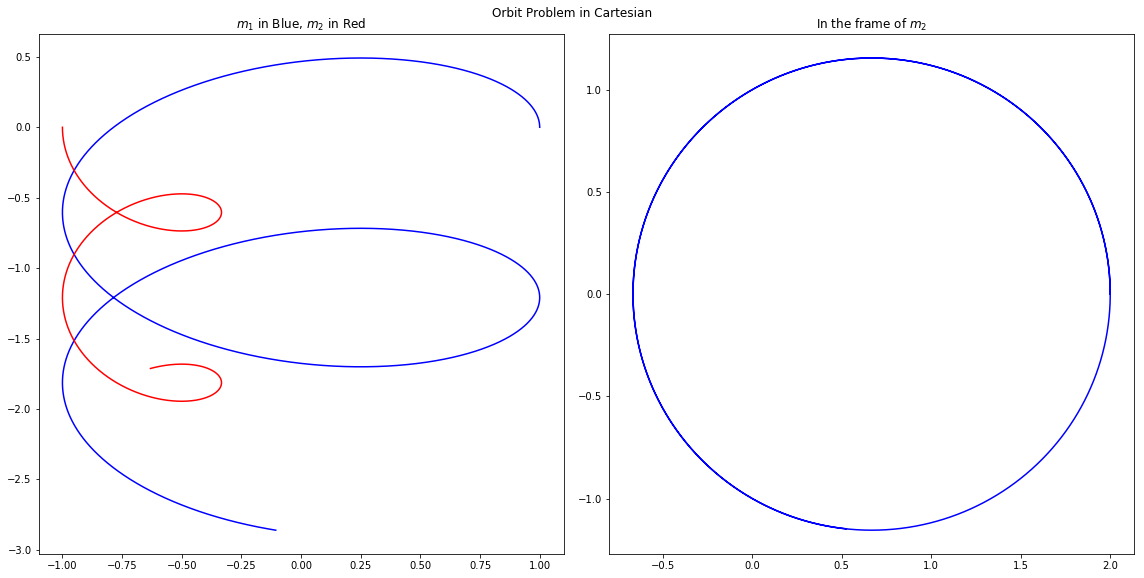

In [69]:
#set the initial conditions
x_1_0 = 1.
x_2_0 = -1.
y_1_0 = 0.
y_2_0 = 0.
x_dot_1_0 = 0.
x_dot_2_0 = 0.
y_dot_1_0 = 1.
y_dot_2_0 = -1.
#solve the orbit!
x_1, y_1, x_2, y_2, x_dot_1, y_dot_1, x_dot_2, y_dot_2 = orbit.solve_ode(t_pts = t_pts,x_1_0= x_1_0, x_2_0=x_2_0, y_1_0 = y_1_0, y_2_0 = y_2_0, x_1_dot_0 = x_dot_1_0, 
              x_2_dot_0=x_dot_2_0 , y_1_dot_0 = y_dot_1_0, y_2_dot_0 = y_dot_2_0)
#Plot the cartesian frame!
fig = plt.figure(figsize =(16,8))

overall_title = 'Orbit Problem in Cartesian'
fig.suptitle(overall_title, va='baseline')

ax_a = fig.add_subplot(1,2,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(x_1[start : stop], x_2[start : stop], y_1[start : stop],y_2[start : stop],
            color='blue',
            label=None, 
            title=r'$m_1$ in Blue, $m_2$ in Red', 
            ax=ax_a) 


#plot in the frame of mass 2!
ax_a = fig.add_subplot(1,2,2)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(x_1[start : stop]-x_2[start : stop], x_2[start : stop] - x_2[start:stop], 
            y_1[start : stop]-y_2[start : stop], y_2[start:stop] - y_2[start:stop],
            color='blue',
            label=None, 
            title=r'In the frame of $m_2$', 
            ax=ax_a) 


fig.tight_layout()


<big><big><big><big><big><big><big><big><big>

Happy Fourier Transform Friday!
</big></big></big></big></big></big></big></big>